### This notebook generates the figure that summarizes unaveraged single trial vs. trial-averaged seeded correlations.
### For Figure 4.
### --> The result is that you find that on single trials there is more localization.

In [1]:
### Load imports.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib
import numpy as np
import time
import scipy.stats
import pickle

from collections import defaultdict

import h5py
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import zscore

import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces
import cosmos.traces.clustering_utils as cu
import cosmos.params.trace_analyze_params as params 

matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 # truetype
matplotlib.rcParams['ps.fonttype'] = 42

/home/user/anaconda3/envs/cosmostools3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
### Set up filepaths.
workstation = 'cosmosdata' #'analysis2'

if workstation == 'analysis2':
    base_dir = '/home/izkula/Dropbox/'
elif workstation == 'cosmosdata':
    base_dir = '/home/user/Dropbox'
    
data_dir = base_dir + '/cosmos_data/'
general_plots_save_dir = base_dir + '/cosmos/trace_analysis/'
fig_save_dir = base_dir + '/cosmos/fig_plots/fig4/'
bpod_dir = base_dir + '/cosmos_data/behavior/'
clustering_dir = base_dir + '/cosmos_data/clustering_results/'
cluster_figs_dir = base_dir + '/cosmos/fig_plots/fig4/'

    
# if not os.path.isdir(fig_save_dir):
os.makedirs(fig_save_dir, exist_ok=True)

In [3]:
# Which datasets to include
# datasets = [7, 19, 18, 11, 22, 23, 24, 25] #[18, 19] #[7, 11, 18, 19]
# datasets = [16] #[16] #[35] #[7, 11, 18, 19] #[18, 19] #[7, 11, 18, 19]

# datasets = [7, 19, 18, 11, 22, 23, 24, 25] ### Use this to compare multiple days
datasets = [7, 19, 18, 11] ### Use this if you just want to look at basic datasets.

# datasets = [7, 11, 18, 19, 35] ### If you want to include spontaneous dataset

mouse_colors = utils.get_colors(4, plt.cm.spectral);


In [4]:
%pdb

Automatic pdb calling has been turned ON


20180401 cux2ai148m72_COSMOSTrainMultiBlockGNG_1
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing that ntrials is:211
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_pre-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_post-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/licks.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/success_rate.pdf
LED trials: 212
Processing traces.
[-34.99899927 423.99899927]
[297.73913811 301.26086189]
Elapsed time: 18.460306406021118
20180709 cux2ai148m194_COSMOSTrainMultiBlockGNG_2
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing t

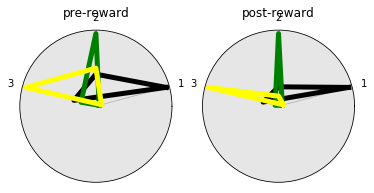

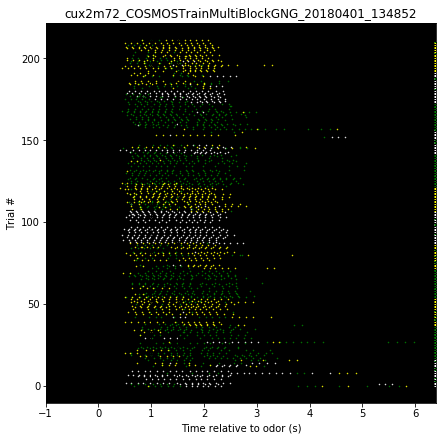

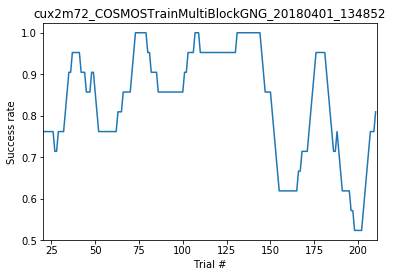

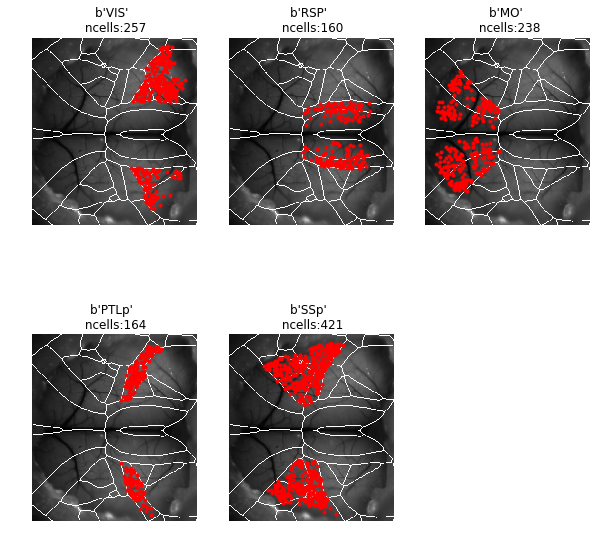

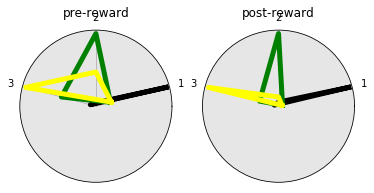

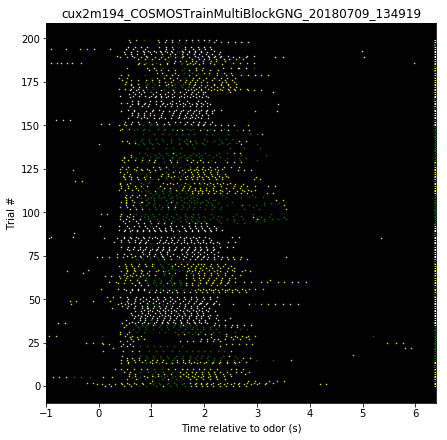

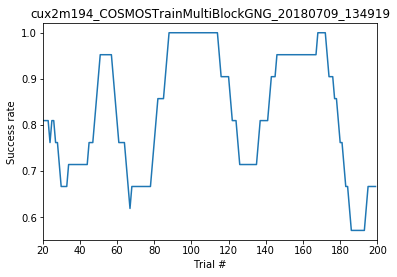

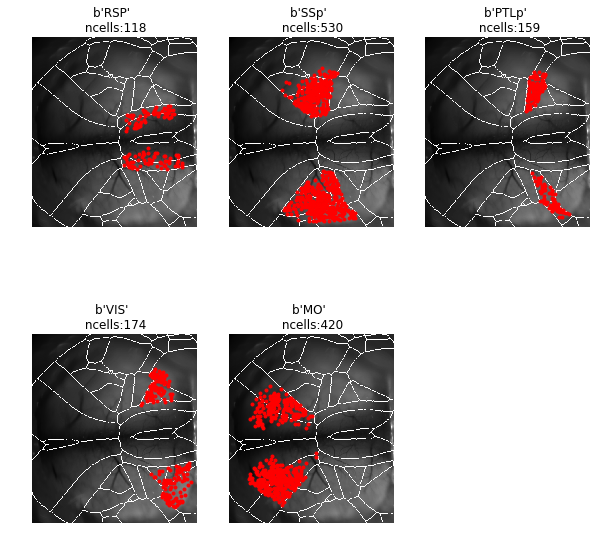

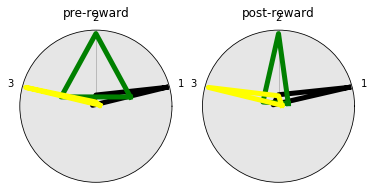

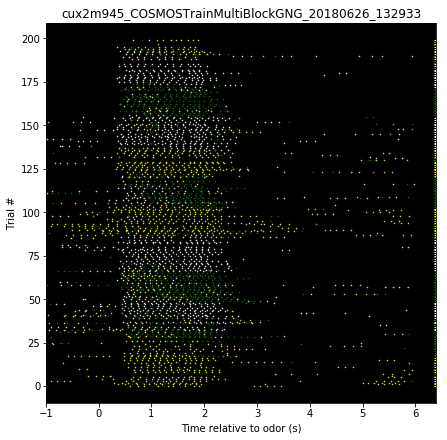

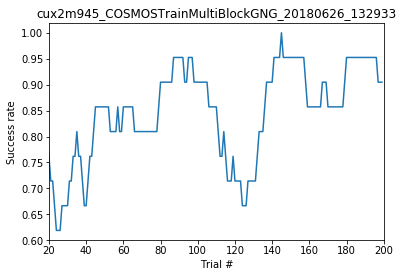

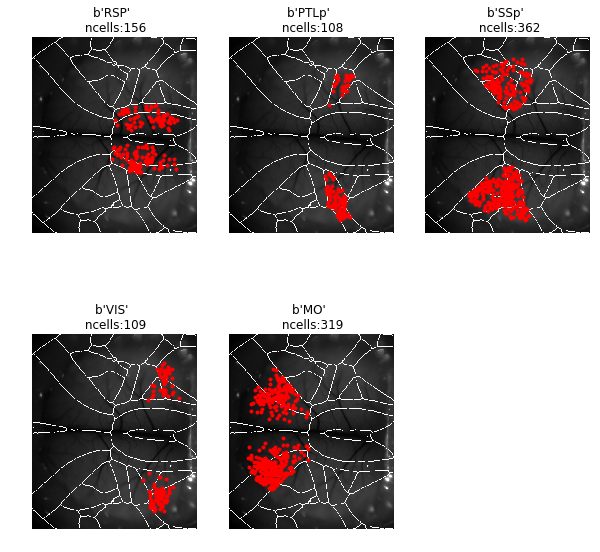

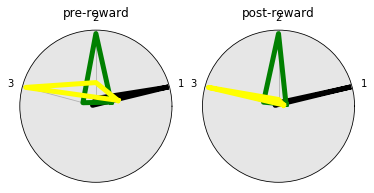

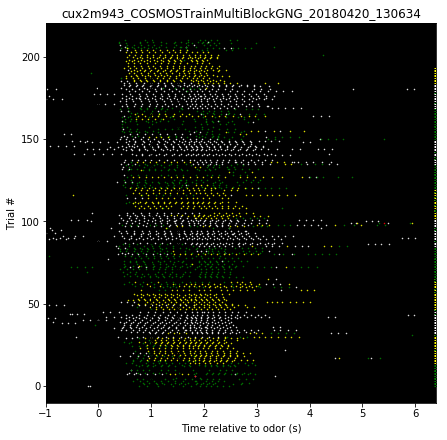

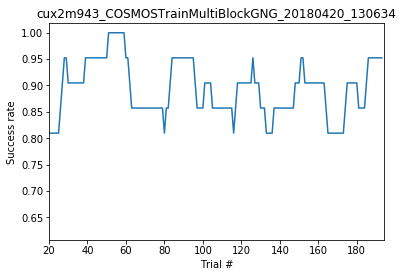

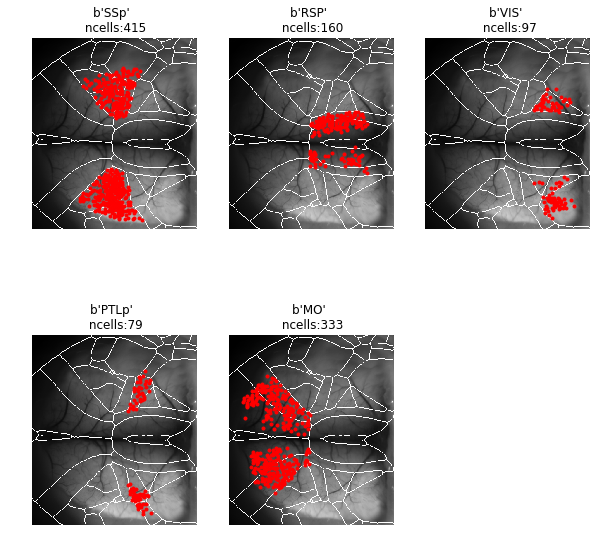

In [5]:
# Load all of the datasets (each their own class).
allCT = []
for dataset_id in datasets:
    dataset = params.DATASETS[dataset_id]
    print(dataset['date'], dataset['name'])
    dataset['data_root'] = data_dir
    dataset['fig_save_dir'] = general_plots_save_dir
    dataset['behavior_dir'] = bpod_dir
    
    startt = time.time()
    CT = CosmosTraces(dataset, do_region_plots=True)
    allCT.append(CT)
    print('Elapsed time: '+str(time.time() - startt))

In [6]:
### Load centroids in units of mm
spatial_sets = [{'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''}]

dsets_spatial = datasets
use_transformed_centroids=True
centroid_scale_factor = 9 # In mm, the horizontal extent of the window. 
(all_centroids, all_labels) = cu.load_centroids_and_task_labels(datasets, 
                                                        allCT,
                                                        spatial_sets,
                                                        dsets_spatial,
                                                        clustering_dir
                                                       )

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt19_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Converting pixels to mm.


/home/user/Dropbox/cosmos/fig_plots/fig4/


/home/user/Code/cosmos-tools/cosmos/traces/trace_analysis_utils.py:751: RuntimeWarning: Mean of empty slice
  mean_corr = np.nanmean(d[np.where(d)[0]])
/home/user/Code/cosmos-tools/cosmos/traces/clustering_utils.py:955: RuntimeWarning: Mean of empty slice
  mean_corr = np.nanmean(corr)
/home/user/anaconda3/envs/cosmostools3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


/home/user/Dropbox/cosmos/fig_plots/fig4/


/home/user/Code/cosmos-tools/cosmos/traces/trace_analysis_utils.py:751: RuntimeWarning: Mean of empty slice
  mean_corr = np.nanmean(d[np.where(d)[0]])


/home/user/Dropbox/cosmos/fig_plots/fig4/


/home/user/anaconda3/envs/cosmostools3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/home/user/Dropbox/cosmos/fig_plots/fig4/


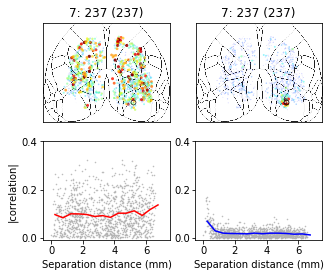

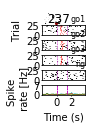

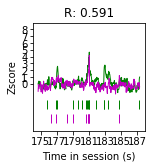

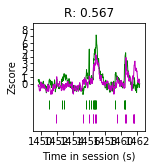

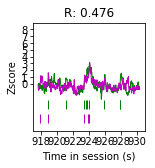

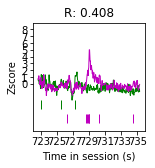

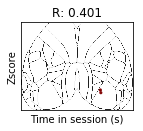

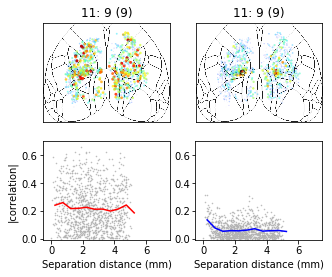

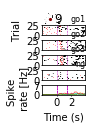

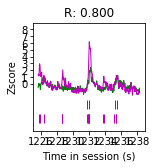

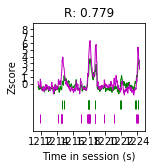

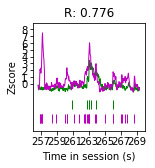

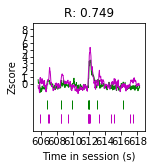

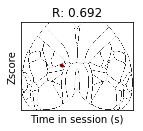

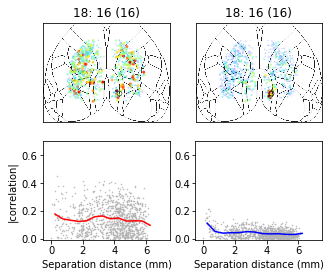

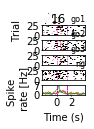

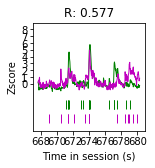

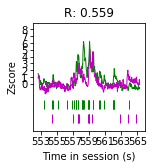

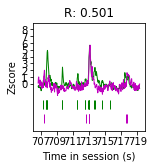

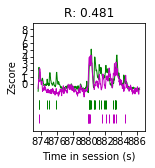

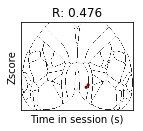

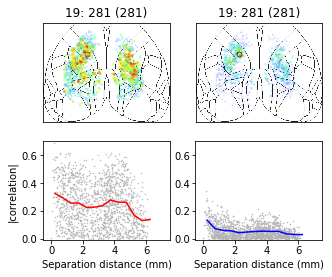

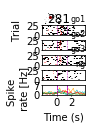

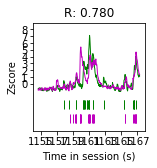

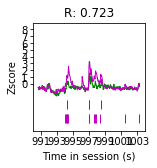

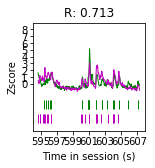

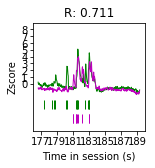

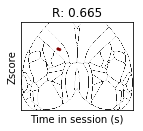

In [7]:
### Generate figure panels. 
data_info = [
    {'dataset_id': 7, 'which_source': 237, 'window_size': 176, 'partner_index': 0, 'trace_ylim':[-7, 9], 'corr_ylim':[-0.01, 0.4]},
    {'dataset_id': 11, 'which_source': 9, 'window_size': 176, 'partner_index': 0, 'trace_ylim':[-7, 9], 'corr_ylim':[-0.01, 0.7]},
    {'dataset_id': 18, 'which_source': 16, 'window_size': 176, 'partner_index': 0, 'trace_ylim':[-7, 9], 'corr_ylim':[-0.01, 0.7]},
    {'dataset_id': 19, 'which_source': 281, 'window_size': 176, 'partner_index': 0, 'trace_ylim':[-7, 9], 'corr_ylim':[-0.01, 0.7]},
]

for i in range(len(data_info)):
# for i in [0]:
    cu.summarize_corr_trial_avg_vs_single_trial(data_info[i], allCT, all_centroids, datasets, 
                                                fig_save_dir)


In [8]:
### Use this for finding good sources (that you can then saveout in the preceding block)
do_search_for_good_sources = False

if do_search_for_good_sources:
    dataset_id = 19
    CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])

    (all_c, all_d, all_p, 
     all_source_ids, smoothed_spikes) = cu.get_all_correlation_vs_dist(['full', '4way'],
                                                                       allCT[CT_ind],
                                                                       all_centroids[dataset_id], 
                                                                       which_hemisphere=None, 
                                                                       do_binarize=False, 
                                                                       do_zscore=False,
                                                                       return_flattened=False)
    
    
    ### These sources were identified by looking manually through a lot of sources for each mouse. 
    d7_sources = [15, 16, 22, 39, 107, 128, 156, 177, 182, 200, 218, 262, 334, 354, 375, 399, 512, 698, 759, 776, 908, 912, 914, 949, 954, 983, 984, 997, 1023, 1042, 1058, 1059, 1086, 1127,
                  0, 6, 13, 21, 27, 42, 55, 57, 73, 84, 89, 100, 112, 139, 145, 149, 106, 187, 201, 219, 231, 237, 260, 274, 283, 288, 293, 326, 330, 333, 367, 374, 378, 424, 430, 441, 447, 448, 537, 541, 570, 580, 652, 666, 683, 721, 726, 778, 792, 793, 796, 816, 821, 824, 826]
    d7_good_sources = [237, 187, 283, 448, 652, 796, 816, 826, 254]

    d11_sources = [0, 9, 14, 17, 22, 50, 66, 73, 91, 99, 144, 172, 193, 198, 241, 258, 282, 295, 307, 311, 320, 336, 385, 428, 455]

    d18_sources = [12, 16, 107, 266, 272, 324, 327, 339, 433, 495, 499]

    d19_sources = [18, 19, 51, 57, 80, 88, 127, 166, 262, 266, 237, 281, 354]

    do_save = False

    for which_source in np.arange(0, 10):
#     for which_source in d19_sources:
        cu.plot_corr_trial_avg_vs_single_trial(which_source, allCT[CT_ind], dataset_id, 
                                               all_c, all_d, all_p, all_source_ids,
                                               max_radius=10, #10
                                               do_pthresh=False, do_valthresh=False, use_abs_val=True,
                                               do_save=do_save, fig_save_dir=fig_save_dir,
                                               smoothed_spikes=smoothed_spikes,
                                                bin_range=[0.15, 9], bin_size=0.5)


### Get distance vs. correlation across mice

/home/user/Dropbox/cosmos/fig_plots/fig4/


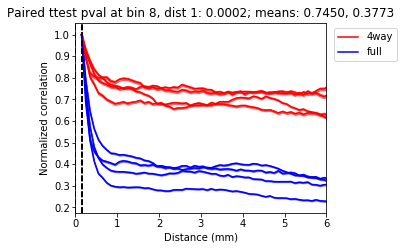

In [9]:
### Get distance vs. correlation and plot across mice (for figure)
mice_all_m = []
mice_all_s = []
which_mice = [7, 11, 18, 19]
for dataset_id in which_mice:
    CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])
    CT = allCT[CT_ind]
    centroid_atlas_coords = all_centroids[dataset_id]


    all_c = dict()
    all_d = dict()
    for which_hemisphere in [None]:
        for which_traces in ['full', '4way']:
            c, d, p, _ = cu.get_correlation_vs_dist(CT, centroid_atlas_coords, 
                                           which_traces=which_traces, 
                                           which_hemisphere=which_hemisphere, 
                                           do_binarize=False, do_zscore=False)
            all_c[which_traces] = c
            all_d[which_traces] = d


    ### Now plot the distance vs. correlation
    all_m, all_s, bins = cu.summarize_binned_correlation_vs_dist(all_c, all_d, bin_range=[0.15, 7], bin_size=0.1,
                                                                use_abs_val=True)
    colors = {'full_0': [0, 0, 1], 'full_1':[0, 0.5, 1], '4way_0':[1, 0, 0], '4way_1':[1, 0.4, 0], '4way':[1, 0, 0], 'full':[0, 0, 1]}
    cu.plot_correlation_vs_dist(all_m, all_s, bins, do_normalize=True, colors=colors)
    plt.xlim([0, 6])
    mice_all_m.append(all_m)
    mice_all_s.append(all_s)
    
    
### Now get p-values
all_m_bin_4way = []
all_m_bin_full = []
which_dist = 1
which_bin = np.argmin(np.abs(bins - which_dist))
do_normalize = True
for i in range(len(mice_all_m)):
    if do_normalize:
        all_m_bin_4way.append(mice_all_m[i]['4way'][which_bin]/np.max(mice_all_m[i]['4way']))
        all_m_bin_full.append(mice_all_m[i]['full'][which_bin]/np.max(mice_all_m[i]['full']))
    else:   
        all_m_bin_4way.append(mice_all_m[i]['4way'][which_bin])
        all_m_bin_full.append(mice_all_m[i]['full'][which_bin])
        
_, p = scipy.stats.ttest_rel(all_m_bin_4way, all_m_bin_full)
plt.title('Paired ttest pval at bin {}, dist {}: {:.4f}; means: {:.4f}, {:.4f}'.format(which_bin, which_dist, p,
                                                                                       np.mean(all_m_bin_4way),
                                                                                       np.mean(all_m_bin_full)))

do_save = True
if do_save:
    savename = 'all_mice_dist_vs_corr_full_vs_4way.pdf'
    print(fig_save_dir)
    plt.gcf().set_size_inches(w=4.5, h=3.5) # Control size of figure in inches
    plt.savefig(os.path.join(fig_save_dir, savename), 
                transparent=True, rasterized=True, dpi=600) 


In [10]:
### Get distance vs. correlation for a specific dataset and plot each hemisphere

do_plot_indiv_dataset = False

if do_plot_indiv_dataset:
    dataset_id = 7
    CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])
    CT = allCT[CT_ind]
    centroid_atlas_coords = all_centroids[dataset_id]


    all_c = dict()
    all_d = dict()
    for which_hemisphere in [0, 1]:
        for which_traces in ['full', '4way']:
            c, d, p, _ = cu.get_correlation_vs_dist(CT, centroid_atlas_coords, 
                                           which_traces=which_traces, 
                                           which_hemisphere=which_hemisphere, 
                                           do_binarize=False, do_zscore=False)
            all_c[which_traces + '_{}'.format(which_hemisphere)] = c
            all_d[which_traces + '_{}'.format(which_hemisphere)] = d
        
    ### Now plot the distance vs. correlation for each_hemisphere for this dataset
    all_m, all_s, bins = cu.summarize_binned_correlation_vs_dist(all_c, all_d, bin_range=[0.15, 6], bin_size=0.1,
                                                                use_abs_val=True)
    colors = {'full_0': [0, 0, 1], 'full_1':[0, 0.5, 1], '4way_0':[1, 0, 0], '4way_1':[1, 0.4, 0]}
    cu.plot_correlation_vs_dist(all_m, all_s, bins, do_normalize=True, colors=colors)

    do_save = True
    if do_save:
        savename = 'id'+str(dataset_id)+'_dist_vs_corr_full_vs_4way.pdf'
        print(fig_save_dir)
        plt.gcf().set_size_inches(w=4.5, h=3.5) # Control size of figure in inches
        plt.savefig(os.path.join(fig_save_dir, savename), 
                    transparent=True, rasterized=True, dpi=600) 

    ### This appears to only work when use_abs_val=True

In [11]:
raise('Done')

TypeError: exceptions must derive from BaseException

> <ipython-input-11-733a9420e381>(1)<module>()
----> 1 raise('Done')

ipdb> quit()
